In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib notebook

# 9.2 Plotting with pandas and seaborn
## Line Plots

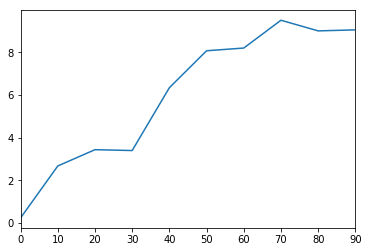

In [2]:
s = pd.Series(np.random.randn(10).cumsum(), index=np.arange(0, 100, 10))
s.plot()

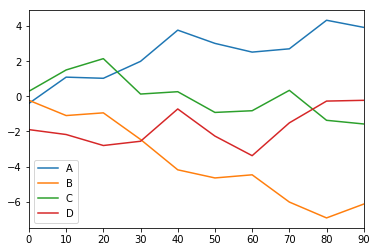

In [3]:
df = pd.DataFrame(np.random.randn(10, 4).cumsum(0),
                  columns=['A', 'B', 'C', 'D'],
                  index=np.arange(0, 100, 10))
df.plot()

## Bar Plots

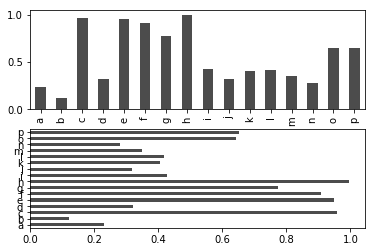

In [4]:
fig, axes = plt.subplots(2, 1)
data = pd.Series(np.random.rand(16), index=list('abcdefghijklmnop'))
data.plot.bar(ax=axes[0], color='k', alpha=0.7)
data.plot.barh(ax=axes[1], color='k', alpha=0.7)

In [5]:
df = pd.DataFrame(np.random.rand(6, 4),
                  index=['one', 'two', 'three', 'four', 'five', 'six'],
                  columns=pd.Index(['A', 'B', 'C', 'D'], name='Genus'))
df

Genus,A,B,C,D
one,0.758424,0.688767,0.810725,0.407367
two,0.784579,0.512066,0.760123,0.689501
three,0.692453,0.845367,0.394928,0.870297
four,0.668021,0.250920,0.027264,0.573117
five,0.485510,0.083352,0.093934,0.251322
six,0.522571,0.434636,0.815019,0.299879


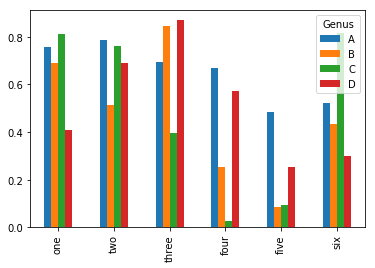

In [6]:
df.plot.bar()

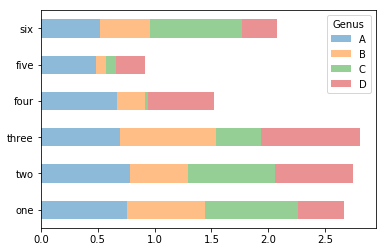

In [7]:
df.plot.barh(stacked=True, alpha=0.5)

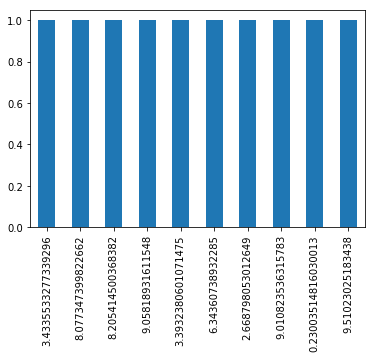

In [8]:
s.value_counts().plot.bar()

In [9]:
tips = pd.read_csv('examples/tips.csv')
tips.head()

,total_bill,tip,smoker,day,time,size
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4


In [10]:
party_counts = pd.crosstab(tips['day'], tips['size'])
party_counts

size,1,2,3,4,5,6
day,,,,,,
Fri,1,16,1,1,0,0
Sat,2,53,18,13,1,0
Sun,0,39,15,18,3,1
Thur,1,48,4,5,1,3


In [11]:
party_counts = party_counts.loc[:, 2:5]
party_counts

size,2,3,4,5
day,,,,
Fri,16,1,1,0
Sat,53,18,13,1
Sun,39,15,18,3
Thur,48,4,5,1


In [12]:
party_pcts = party_counts.div(party_counts.sum(1), axis=0)
party_pcts

size,2,3,4,5
day,,,,
Fri,0.888889,0.055556,0.055556,0.000000
Sat,0.623529,0.211765,0.152941,0.011765
Sun,0.520000,0.200000,0.240000,0.040000
Thur,0.827586,0.068966,0.086207,0.017241


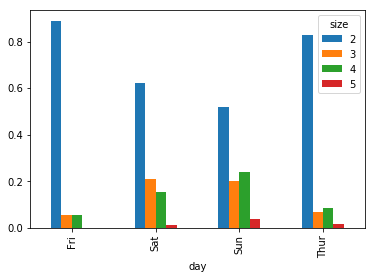

In [13]:
party_pcts.plot.bar()

In [14]:
import seaborn as sns

In [15]:
tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip'])
tips.head()

,total_bill,tip,smoker,day,time,size,tip_pct
0,16.99,1.01,No,Sun,Dinner,2,0.063204
1,10.34,1.66,No,Sun,Dinner,3,0.191244
2,21.01,3.50,No,Sun,Dinner,3,0.199886
3,23.68,3.31,No,Sun,Dinner,2,0.162494
4,24.59,3.61,No,Sun,Dinner,4,0.172069


C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


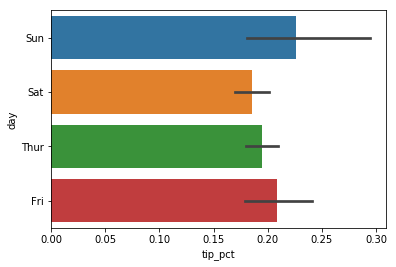

In [16]:
sns.barplot(x='tip_pct', y='day', data=tips, orient='h')

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


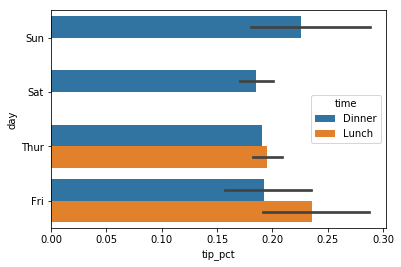

In [17]:
sns.barplot(x='tip_pct', y='day', hue='time', data=tips, orient='h')

In [18]:
sns.set(style="whitegrid")

## Histograms and Density Plots

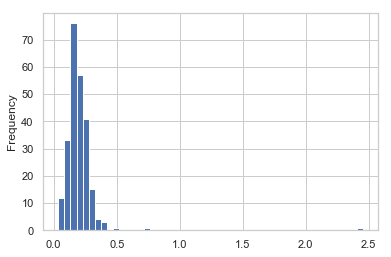

In [19]:
tips['tip_pct'].plot.hist(bins=50)

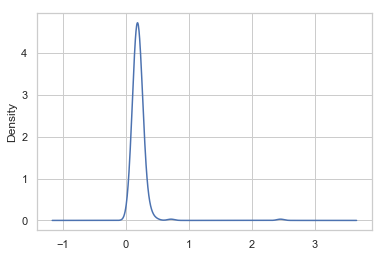

In [20]:
tips['tip_pct'].plot.density()

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


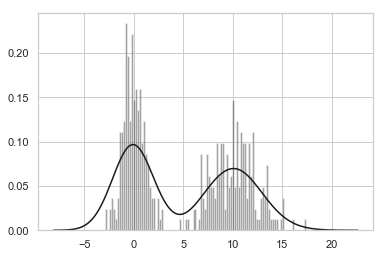

In [21]:
comp1 = np.random.normal(0, 1, size=200)
comp2 = np.random.normal(10, 2, size=200)
values = pd.Series(np.concatenate([comp1, comp2]))
sns.distplot(values, bins=100, color='k')

## Scatter or Point Plots

In [22]:
macro = pd.read_csv('examples/macrodata.csv')
data = macro[['cpi', 'm1', 'tbilrate', 'unemp']]
trans_data = np.log(data).diff().dropna()
trans_data[-5:]

,cpi,m1,tbilrate,unemp
198,-0.007904,0.045361,-0.396881,0.105361
199,-0.021979,0.066753,-2.277267,0.139762
200,0.002340,0.010286,0.606136,0.160343
201,0.008419,0.037461,-0.200671,0.127339
202,0.008894,0.012202,-0.405465,0.042560


C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5, 1.0, 'Changes in log m1 versus log unemp')

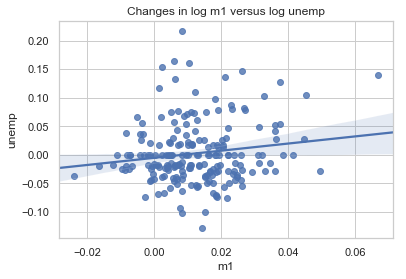

In [23]:
sns.regplot('m1', 'unemp', data=trans_data)
plt.title('Changes in log %s versus log %s' % ('m1', 'unemp'))

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


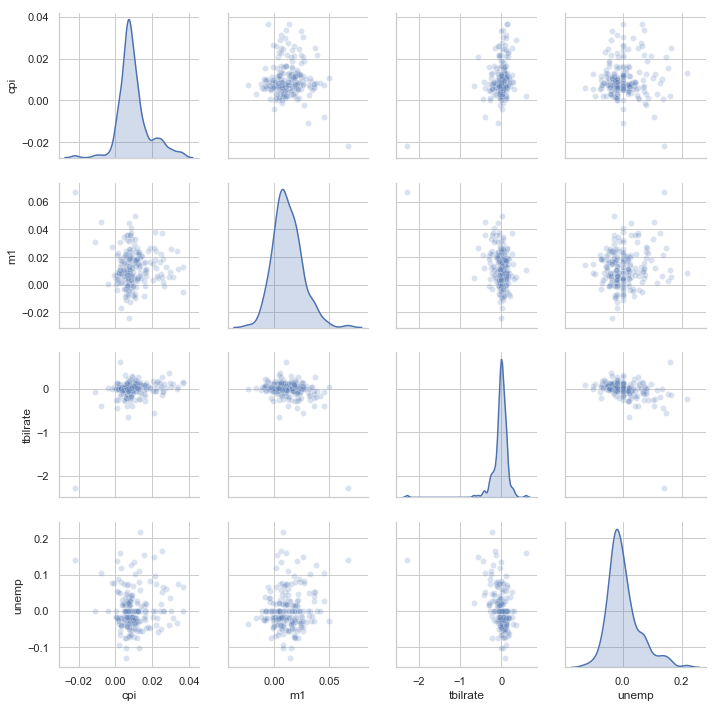

In [24]:
sns.pairplot(trans_data, diag_kind='kde', plot_kws={'alpha': 0.2})

## Facet Grids and Categorical Data

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


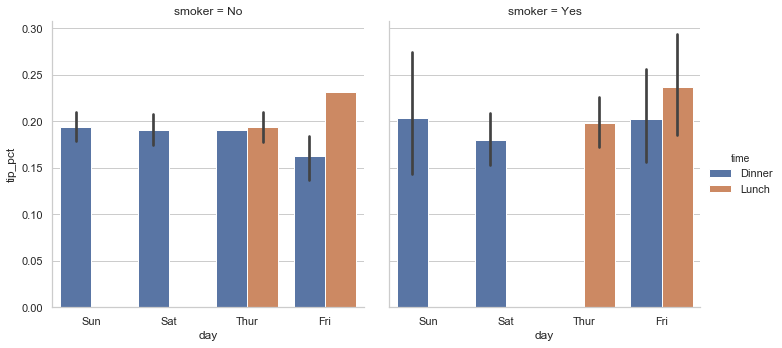

In [25]:
sns.factorplot(x='day', y='tip_pct', hue='time', col='smoker',
               kind='bar', data=tips[tips.tip_pct < 1])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


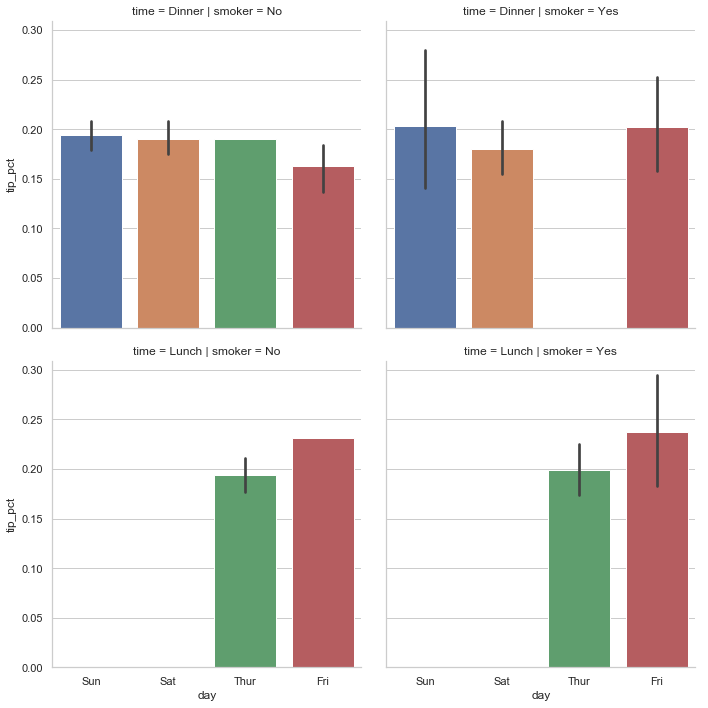

In [26]:
sns.factorplot(x='day', y='tip_pct', row='time',
               col='smoker',
               kind='bar', data=tips[tips.tip_pct < 1])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


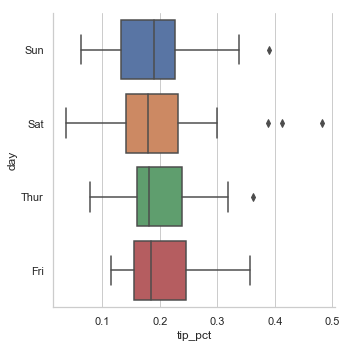

In [27]:
sns.factorplot(x='tip_pct', y='day', kind='box',
               data=tips[tips.tip_pct < 0.5])

# Chapter 9 problem set 1

## John

1. Create a smiley face using 4 subplots

In [28]:
import matplotlib.patches as patches

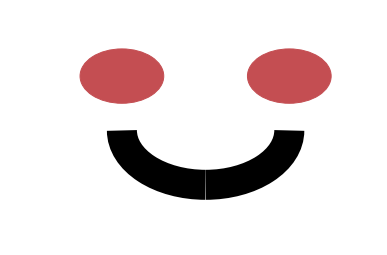

In [29]:
fig, axes = plt.subplots(2, 2)
plt.subplots_adjust(wspace=0, hspace=0)
for i in range(2):
    for j in range(2):
        axes[i,j].set_axis_off()
left_eye = plt.Circle((0.5, 0.4), 0.25, color='r', alpha=1)
right_eye = plt.Circle((0.5, 0.4), 0.25, color='r', alpha=1)
left_smile = patches.Arc((1,.9),1,1,theta1=180,theta2=270, linewidth = 30, color = 'black')
right_smile = patches.Arc((0,.9),1,1,theta1=270,theta2=360, linewidth = 30, color = 'black')
axes[0,0].add_patch(left_eye)
axes[0,1].add_patch(right_eye)
axes[1,0].add_patch(left_smile)
axes[1,1].add_patch(right_smile)

2. Create a snowman on one plot

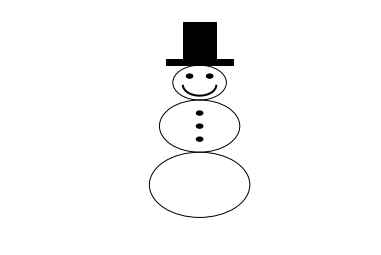

In [30]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.set_axis_off()
legs = plt.Circle((.5,.2), 0.15, color='black', alpha=1, fill = False)
body = plt.Circle((.5,.47), 0.12, color='black', alpha=1, fill = False)
head = plt.Circle((.5,.67), 0.08, color='black', alpha=1, fill = False)
left_eye = plt.Circle((0.47, 0.7), 0.01, color='black', alpha=1)
right_eye = plt.Circle((0.53, 0.7), 0.01, color='black', alpha=1)
smile = patches.Arc((.5,.66),.1,.1,theta1=180,theta2=360, linewidth = 2, color = 'black')
coal_1 = plt.Circle((.5,.53), 0.01, color='black', alpha=1)
coal_2 = plt.Circle((.5,.47), 0.01, color='black', alpha=1)
coal_3 = plt.Circle((.5,.41), 0.01, color='black', alpha=1)
hat_base = plt.Rectangle((.4,.75),.2,.03, color='black')
hat_top = plt.Rectangle((.45,.75),.1,.2, color='black')
ax.add_patch(legs)
ax.add_patch(body)
ax.add_patch(head)
ax.add_patch(smile)
ax.add_patch(left_eye)
ax.add_patch(right_eye)
ax.add_patch(coal_1)
ax.add_patch(coal_2)
ax.add_patch(coal_3)
ax.add_patch(hat_base)
ax.add_patch(hat_top)

## Min-Yao

Please use matplotlib to draw a 3D random walk for 3000 steps.

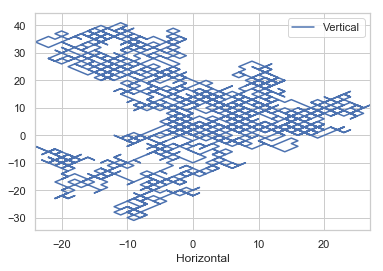

In [31]:
walk = pd.DataFrame(np.where(np.random.randn(3001,2) > 0, 1, -1),
                    columns=['Horizontal', 'Vertical'])
walk['Horizontal'][0] = 0
walk['Vertical'][0] = 0
walk = walk.expanding(2).sum()
walk['Horizontal'][0] = 0
walk['Vertical'][0] = 0
walk.plot(x = 'Horizontal', y = 'Vertical')

## Kae
Please try to recreate this masterpiece. ![](https://raw.githubusercontent.com/UCD-pbio-rclub/python-data-analysis_KaeL/master/chickie.png)

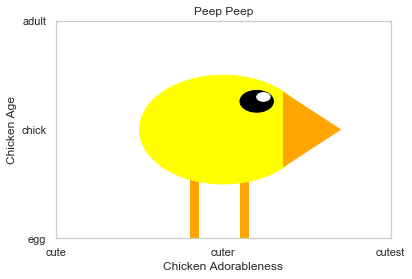

In [32]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.set_title('Peep Peep')
ax.set_xticks([0, .5, 1])
ax.set_xticklabels(['cute', 'cuter', 'cutest'])
ax.set_xlabel('Chicken Adorableness')
ax.set_yticks([0, .5, 1])
ax.set_yticklabels(['egg', 'chick', 'adult'])
ax.set_ylabel('Chicken Age')
ax.grid(False)
body = plt.Circle((.5,.5), 0.25, color='yellow', alpha=1, fill = True)
beak = plt.Polygon([[.68,.67],[.68,.33],[.85,.5]], color='orange', alpha=1, fill = True)
eye_1 = plt.Circle((0.6, 0.63), 0.05, color='black', alpha=1)
eye_2 = plt.Circle((0.62, 0.65), 0.02, color='white', alpha=1)
leg_1 = plt.Rectangle((.55,0),.025,.4, color='orange')
leg_2 = plt.Rectangle((.4,0),.025,.4, color='orange')
ax.add_patch(leg_1)
ax.add_patch(leg_2)
ax.add_patch(body)
ax.add_patch(beak)
ax.add_patch(eye_1)
ax.add_patch(eye_2)

## HW Problem for next week

## John

1. Recreate the two plots below using this dataset: [diamonds](https://github.com/UCD-pbio-rclub/python-data-analysis_JohnD/raw/master/datasets/diamonds.csv)

![Plot 1](https://d33wubrfki0l68.cloudfront.net/2bb18193f75fe829a1bfd3144efc191046bec699/e2639/eda_files/figure-html/unnamed-chunk-34-1.png)
![Plot 2](https://d33wubrfki0l68.cloudfront.net/2b853af846efb6683ab09371144a96b0a2e179cb/c3ba5/eda_files/figure-html/unnamed-chunk-35-1.png)